This example illustrates fitting and comparing two Machine Learning algorithms for classifying     
the binary target in the BANK data set. The steps include:                                    
                                                                      
1. PREPARE AND EXPLORE  
  a) Load data set into CAS                                        
<br>                                                   
2. PERFORM SUPERVISED LEARNING  
  a) Fit model using Logistic Regression  
  b) Fit a model using a Decision Tree                             
<br>                                                                     
3.  EVALUATE AND IMPLEMENT  
  a) Score the data  
  b) Assess model performance  
  c) Generate ROC and Lift charts 

### Import packages

In [1]:
from swat import *
import pandas as pd
import matplotlib.pyplot as plt
from swat.render import render_html
%matplotlib inline

### CAS Server connection details

In [2]:
cashost='localhost'
casport=5570
casauth='~/.authinfo'

### Start CAS session

In [3]:
sess = CAS(cashost, casport, authinfo=casauth, caslib="casuser")

### Details for local data to be loaded into CAS

In [4]:
indata_dir="/opt/sasinside/DemoData"
indata="bank"
im_class_inputs    = "cat_input1, cat_input2"
im_interval_inputs = "logi_rfm1-logi_rfm12"; 
target             = "b_tgt"

### Import table action set

In [5]:
sess.loadactionset(actionset="table")
sess.loadactionset(actionset="sampling")
sess.loadactionset(actionset="regression")
sess.loadactionset(actionset="percentile")
sess.loadactionset(actionset="dataStep")
sess.loadactionset(actionset="decisionTree")

NOTE: Added action set 'table'.
NOTE: Added action set 'sampling'.
NOTE: Added action set 'regression'.
NOTE: Added action set 'percentile'.
NOTE: Added action set 'dataStep'.
NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.000835s, sys: 0.001s, mem: 0.0295mb

### Load data into CAS

In [6]:
if not sess.table.tableExists(table=indata).exists:
    tbl = sess.upload_file(indata_dir+"/"+indata+".sas7bdat", casout={"name":indata})

NOTE: Cloud Analytic Services made the uploaded file available as table BANK in caslib CASUSER(viyauser).
NOTE: The table BANK has been created in caslib CASUSER(viyauser) from binary data uploaded to Cloud Analytic Services.


### Partition the data into training and validation

In [7]:
sess.sampling.stratified(
  table={"name":"bank", "groupBy":target},
  output={"casOut":{"name":"bank_part", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  partind=True
)

NOTE: Using SEED=1187789481 for sampling.


[outputSize]

 {'outputNObs': 1060038.0, 'outputNVars': 55}

[STRAFreq]

 Frequencies
 
    ByGrpID         b_tgt    NObs   NSamp
 0        0             0  848529  593970
 1        1             1  211509  148056

[OutputCasTables]

               casLib       Name Label     Rows  Columns  \
 0  CASUSER(viyauser)  bank_part        1060038       55   
 
                                             casTable  
 0  CASTable('bank_part', caslib='CASUSER(viyauser)')  

+ Elapsed: 0.663s, user: 2.61s, sys: 0.688s, mem: 47.4mb

### LOGISTIC REGRESSION predictive model 

In [8]:
# ALL data used for training model 
lr = sess.regression.logistic(
  table={"name":"bank_part"},
  classVars=[{"vars":{"b_tgt", "cat_input1", "cat_input2"}}],
  model={
    "depVars":[{"name":target, "options":{"event":"1"}}],
    "effects":[{"vars":{"cat_input1", "cat_input2", "logi_rfm1", "logi_rfm2",
                       "logi_rfm3", "logi_rfm4", "logi_rfm5", "logi_rfm6", "logi_rfm7",
                       "logi_rfm8", "logi_rfm9", "logi_rfm10", "logi_rfm11", "logi_rfm12"}}]
  },
  partByVar={"name": "_partind_", "train": "1", "valid": "0"},
  selection={"method":"BACKWARD"},
  output={"casOut":{"name":"_scored_logistic", "replace":True}, "copyVars":"ALL"}
)

# Output model statistics
render_html(lr)

# Compute _pred0_ variable (1-_pred_)
sess.dataStep.runCode(
  code="data _scored_logistic; set _scored_logistic; _pred0_=1-_pred_; run;"
)

NOTE: Convergence criterion (GCONV=1E-8) satisfied.


Model Information 
 RowId 
 Description 
 Value 
 
 
 DATA Data Source BANK_PART 
 RESPONSEVAR Response Variable b_tgt 
 DIST Distribution Binary 
 LINK Link Function Logit 
 TECH Optimization Technique Newton-Raphson with Ridging 
 
 
 
 
 Number of Observations 
 RowId 
 Description 
 Total 
 Training 
 Validation 
 
 
 NREAD Number of Observations Read 1060038 742026 318012 
 NUSED Number of Observations Used 1060038 742026 318012 
 
 
 
 
 Response Profile 
 Ordered Value 
 b_tgt 
 Binary New Product 
 Total Frequency 
 Training 
 Validation 
 Probability Modeled 
 
 
 1 0 0 848529 593970 254559 
 2 1 1 211509 148056 63453 * 
 
 
 
 
 Class Level Information 
 Class 
 Levels 
 Values 
 
 
 cat_input2 5 A B C D E 
 cat_input1 3 X Y Z 
 
 
 
 
 Selection Information 
 Description 
 Value 
 Numeric Value 
 
 
 Selection Method Backward nan 
 Select Criterion SBC nan 
 Stop Criterion SBC nan 
 Effect Hierarchy Enforced Single nan 
 Stop Horizon 3 3 
 
 
 
 
 Convergence Status 
 Reason 
 Status 
 Max Gradient 
 
 
 Convergence criterion (GCONV=1E-8) satisfied. 0 9.578494E-11 
 
 
 
 
 Selection Summary 
 Control 
 Step 
 Effect Removed 
 Number Of Effects 
 SBC 
 Optimal SBC 
 
 
 0 15 545746.46493 0 
 - 1 logi_rfm4 14 545733.67358 0 
 2 logi_rfm1 13 545725.39081 0 
 3 logi_rfm11 12 545716.33587 1 
 4 logi_rfm8 11 545728.53544 0 
 5 logi_rfm7 10 545761.6212 0 
 6 logi_rfm6 9 545861.40501 0 
 
 
 
 
 Stop Reason 
 Reason 
 Code 
 
 
 Selection stopped at a local minimum of the STOP criterion. 6 
 
 
 
 
 Selection Reason 
 Reason 
 
 
 The model at step 3 is selected. 
 
 
 
 
 Selected Effects 
 Label 
 Effects 
 
 
 Selected Effects: Intercept logi_rfm8 logi_rfm5 logi_rfm9 logi_rfm10 logi_rfm7 logi_rfm3 cat_input2 logi_rfm6 logi_rfm2 logi_rfm12 cat_input1 
 
 
 
 
 Dimensions 
 RowId 
 Description 
 Value 
 
 
 NDESIGNCOLS Columns in Design 18 
 NEFFECTS Number of Effects 12 
 MAXEFCOLS Max Effect Columns 5 
 DESIGNRANK Rank of Design 16 
 OPTPARM Parameters in Optimization 16 
 
 
 
 
 Likelihood Ratio Test 
 Test 
 DF 
 Chi-Square 
 Pr > ChiSq 
 
 
 Likelihood Ratio 15 196153.9466 0 
 
 
 
 
 Fit Statistics 
 RowId 
 Description 
 Training 
 Validation 
 
 
 M2LL -2 Log Likelihood 545500.05518 233523.23945 
 AIC AIC (smaller is better) 545532.05518 233555.23945 
 AICC AICC (smaller is better) 545532.05592 233555.24116 
 SBC SBC (smaller is better) 545716.32942 233725.95696 
 ASE Average Square Error 0.1147475696 0.1144903548 
 M2LLNULL -2 Log L (Intercept-only) 741654.00178 317853.28735 
 RSQUARE R-Square 0.2322945559 0.2329312319 
 ADJRSQ Max-rescaled R-Square 0.3675918524 0.36859887 
 MCFADDEN McFadden's R-Square 0.2644817477 0.265311234 
 MISCLASS Misclassification Rate 0.1618258659 0.1612580657 
 DIFFMEAN Difference of Means 0.2804890629 0.2808040487 
 
 
 
 
 Parameter Estimates 
 Effect 
 cat_input2 
 cat_input1 
 Parameter 
 Parameter 
 DF 
 Estimate 
 Standard Error 
 Chi-Square 
 Pr > ChiSq 
 
 
 Intercept Intercept Intercept 1 6.8363601536 0.0809484308 7132.3558003 0 
 logi_rfm8 logi_rfm8 logi_rfm8 1 0.0807632289 0.0159239734 25.723168445 3.9406773E-7 
 logi_rfm5 logi_rfm5 logi_rfm5 1 1.7312823337 0.0156654583 12213.765664 0 
 logi_rfm9 logi_rfm9 logi_rfm9 1 -2.288158133 0.0148259282 23819.261174 0 
 logi_rfm10 logi_rfm10 logi_rfm10 1 -0.269347565 0.015482936 302.63522218 8.783213E-68 
 logi_rfm7 logi_rfm7 logi_rfm7 1 -0.111785306 0.0131842001 71.888905041 2.276604E-17 
 logi_rfm3 logi_rfm3 logi_rfm3 1 -0.267150622 0.0142524425 351.34500476 2.158974E-78 
 cat_input2 A cat_input2 A cat_input2_A 1 1.3864852861 0.0098839028 19677.666748 0 
 cat_input2 B cat_input2 B cat_input2_B 1 0.8400725441 0.0099645676 7107.4967145 0 
 cat_input2 C cat_input2 C cat_input2_C 1 0.4643827943 0.0105308271 1944.5865609 0 
 cat_input2 D cat_input2 D cat_input2_D 1 0.3662296888 0.0121228861 912.63064222 1.76235E-200 
 cat_input2 E cat_input2 E cat_input2_E 0 0 nan nan nan 
 logi_rfm6 logi_rfm6 logi_rfm6 1 -0.176835919 0.0165867625 113.6

,casLib,Name,Rows,Columns,casTable
0,CASUSER(viyauser),_scored_logistic,1060038,56,"CASTable('_scored_logistic', caslib='CASUSER(v..."
,casLib,Name,Rows,Columns,casTable
0,CASUSER(viyauser),_scored_logistic,1060038,57,"CASTable('_scored_logistic', caslib='CASUSER(v..."


### Assess model performance (LOGISTIC REGRESSION) 

In [9]:
logitAssess=sess.percentile.assess(
  table={
    "name":"_scored_logistic", 
    "where": "strip(put(_partind_, best.))='0'"
  },
  inputs=[{"name":"_pred_"}],
  response="b_tgt",
  event="1",
  pVar={"_pred0_"},
  pEvent={"0"}
)

logic_fitstat =logitAssess.FitStat
logit_rocinfo =logitAssess.ROCInfo
logit_liftinfo=logitAssess.LIFTInfo

### DECISION TREE predictive model

In [10]:
dt = sess.decisionTree.dtreeTrain(
  table={"name":"bank_part", 
         "where":"strip(put(_partind_, best.))='1'"},
  inputs={"cat_input1", "cat_input2", "logi_rfm1", "logi_rfm2",
          "logi_rfm3", "logi_rfm4", "logi_rfm5", "logi_rfm6", "logi_rfm7",
          "logi_rfm8", "logi_rfm9", "logi_rfm10", "logi_rfm11", "logi_rfm12"},
  target="b_tgt",
  nominals={"b_tgt", "cat_input1", "cat_input2"},
  crit="GAIN",
  prune=True,
  maxLevel=10,
  casOut={"name":"tree_model", "replace":True}
)

# Output model statistics
render_html(dt)

# Score 
sess.decisionTree.dtreeScore(
  table={"name":"bank_part"},
  modelTable={"name":"tree_model"},
  casOut={"name":"_scored_tree", "replace":True},
  copyVars={"b_tgt", "_partind_"}
)

# Create p_b_tgt0 and p_b_tgt1 as _dt_predp_ is the probability of event in _dt_predname_
sess.dataStep.runCode(
  code="data _scored_tree; set _scored_tree; if _dt_predname_=1 then do; p_b_tgt1=_dt_predp_; p_b_tgt0=1-p_b_tgt1; end; if _dt_predname_=0 then do; p_b_tgt0=_dt_predp_; p_b_tgt1=1-p_b_tgt0; end; run;"
)

Decision Tree for BANK_PART 
 Descr 
 Value 
 
 
 Number of Tree Nodes 517 
 Max Number of Branches 2 
 Number of Levels 10 
 Number of Leaves 259 
 Number of Bins 20 
 Minimum Size of Leaves 5 
 Maximum Size of Leaves 83432 
 Number of Variables 14 
 Confidence Level for Pruning 0.25 
 Number of Observations Used 742026 
 Misclassification Error (%) 15.383423222 
 
 
 
 
 Output CAS Tables 
 CAS Library 
 Name 
 Number of Rows 
 Number of Columns 
 Table 
 
 
 CASUSER(viyauser) tree_model 517 35 CASTable('tree_model', caslib='CASUSER(viyauser)')

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:39    0:114
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 8 times)
      0:39    0:114  (occurred 8 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(viyauser),_scored_tree,1060038,18,"CASTable('_scored_tree', caslib='CASUSER(viyau..."
,casLib,Name,Rows,Columns,casTable
0,CASUSER(viyauser),_scored_tree,1060038,20,"CASTable('_scored_tree', caslib='CASUSER(viyau..."


### Assess model performance (DECISION TREE) 

In [11]:
treeAssess=sess.percentile.assess(
  table={
    "name":"_scored_tree", 
    "where": "strip(put(_partind_, best.))='0'"               
  },
  inputs=[{"name":"p_b_tgt1"}],  
  response="b_tgt",
  event="1",
  pVar={"p_b_tgt0"},
  pEvent={"0"}
)

tree_fitstat = treeAssess.FitStat
tree_rocinfo = treeAssess.ROCInfo
tree_liftinfo= treeAssess.LIFTInfo

### Create ROC and Lift plots (both models) using validation data

--------------------------AUC (using validation data)---------------------------


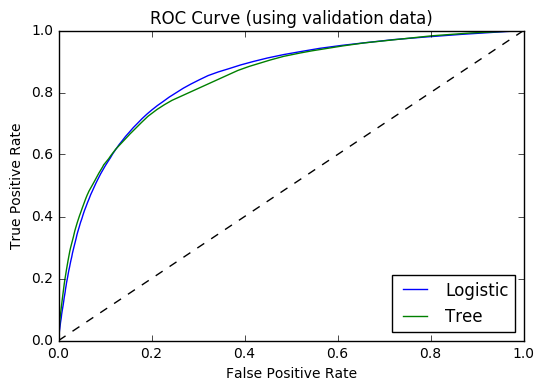

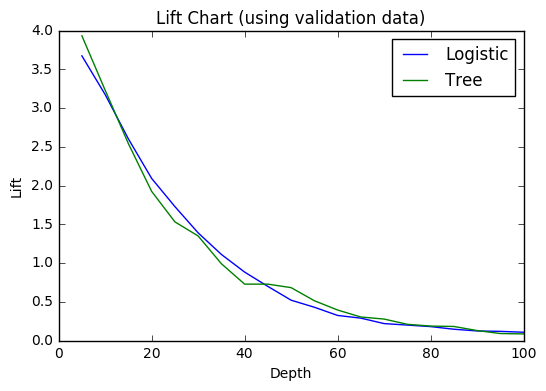

In [12]:
# Add new variable to indicate type of model
logit_liftinfo["model"]="Logistic"
logit_rocinfo["model"]="Logistic"
tree_liftinfo["model"]="Tree"
tree_rocinfo["model"]="Tree"

# Append data
all_liftinfo=logit_liftinfo.append(tree_liftinfo, ignore_index=True)
all_rocinfo=logit_rocinfo.append(tree_rocinfo, ignore_index=True)

#/* Print AUC (Area Under the ROC Curve) */
print("AUC (using validation data)".center(80, '-'))
all_rocinfo[["model", "C"]].drop_duplicates(keep="first").sort_values(by="C", ascending=False)

#/* Draw ROC charts */ 
plt.figure()
for key, grp in all_rocinfo.groupby(["model"]):
    plt.plot(grp["FPR"], grp["Sensitivity"], label=key)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC Curve (using validation data)")
plt.show()

#/* Draw lift charts */
plt.figure()
for key, grp in all_liftinfo.groupby(["model"]):
    plt.plot(grp["Depth"], grp["Lift"], label=key)
plt.xlabel("Depth")
plt.ylabel("Lift")
plt.legend(loc="best")
plt.title("Lift Chart (using validation data)")
plt.show();


### End CAS session

In [13]:
sess.close()